# Problem 1: Data from yfinance

Importing the [yfinance](https://github.com/ranaroussi/yfinance) package.

In [1]:
# Import yfinance library.
import yfinance as yf

# https://docs.python.org/3/library/datetime.html#examples-of-usage-date
# Date and times.
import datetime as dt

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Listing files in a folder.
import os

In [2]:
def get_data():
    # Using `download` method to get data for 5 days period
    # https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance-download
    df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')

    # Current date and time
    now = dt.datetime.now()

    # Format: YYYYMMDD-HHMMSS
    now.strftime("%Y%m%d-%H%M%S")

    # Create file name with timestamp
    file_name = now.strftime("%Y%m%d-%H%M%S") + ".csv"
    print(file_name)

    # Save with timestamped filename
    df.to_csv("data/" + now.strftime("%Y%m%d-%H%M%S") + ".csv")    

    

In [3]:
get_data()

/tmp/ipykernel_132019/3592884893.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')


[*********************100%***********************]  5 of 5 completed

20251219-181326.csv


# Problem 2: Plotting Data

In [4]:
def plot_data():
    """
    Reads the latest CSV file from the data folder, plots the Close prices 
    for all five stocks on a single figure, adds labels and a title, and 
    saves the plot as a timestamped PNG file in the plots folder.
    """

    # Get current date and time.
    now = dt.datetime.now()

    # List all files in the data folder.
    data_files = os.listdir('data/')

    # Sort files
    sorted_data_files = sorted(data_files, reverse=True)

    # Read the most recent file.
    df = pd.read_csv('data/' + sorted_data_files[0], header=[0,1], index_col=0, parse_dates=True)

    # Plot new figure and axis.
    fig, ax = plt.subplots()

    # Plot five stocks
    df['Close'].plot(ax=ax)

    # Titles and axes
    ax.set_xlabel("Date")
    ax.set_ylabel("Closing Price (USD)")
    ax.legend(title="Ticker")
    ax.set_title(df.index[-1].strftime("%Y-%m-%d"))

    # Create unique PNG name
    path = 'plots/'
    png_file_name = now.strftime("%Y%m%d-%H%M%S") + ".png"
    full_file_name = path + png_file_name

    # Save figure
    fig.savefig(full_file_name, dpi=300)
    plt.close(fig)

In [5]:
plot_data()

NameError: name 'df' is not defined

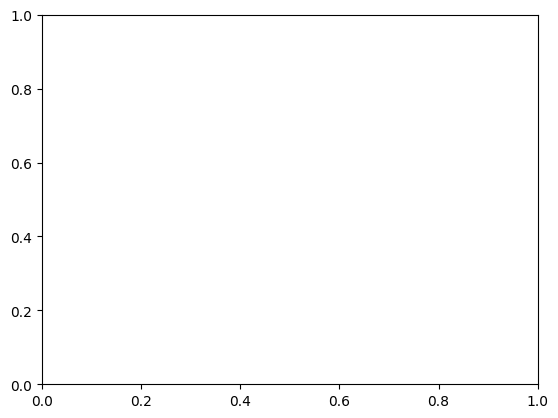

In [6]:
# Plot new figure and axis.
fig, ax = plt.subplots()

# Plot five stocks
df['Close'].plot(ax=ax)

path = 'plots/'
png_file_name = now.strftime("%Y%m%d-%H%M%S") + ".png"
full_file_name = path + png_file_name


# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html#matplotlib-pyplot-savefig
fig.savefig(full_file_name, dpi=300)

# List files in the data folder
data_files = os.listdir('data/')

# Sort files
sorted_data_files = sorted(data_files, reverse=True)
print(sorted_data_files[0])


In [ ]:
# Read the most recent file.
df = pd.read_csv('data/' + sorted_data_files[0], header=[0,1], index_col=0, parse_dates=True)

# Show.
df.index

DatetimeIndex(['2025-11-20', '2025-11-21', '2025-11-24', '2025-11-25',
               '2025-11-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

## Problem 3: Script

### Explanation of Steps for `faang.py`

1. **Created the script file**  
   I created a new file named `faang.py` in the root of the repository as it was asked in a task.

2. **Added a shebang line**  
   At the top of the file, I added:
   ```python
   #!/usr/bin/env python

   This line tells the interpreter what language we will use.

3. Imported neccecires libraries:
   - `matplotlib.pyplot` makes plot.

   - `yfinance` finance library which download stock data.

   - `pandas` for handling with data frames.

   - `datetime` for timestamps

   - `os` for listing files

4. Defined the `plot_data` function
- Finds the latest CSV file in `data` folder.
- Reads it into a DataFrame.
- PLots the Close prices of five stocks on a plot.
- Saves the plot into the `plots` folder with the timestamped name.

5. Added piece of code to execute it direclty.
      ```python
      if __name__ == "__main__":
         plot_data()
      ```

This allows anyone to run the script from the terminal using Git Bash `./faang.py`  or on Windows `python faang.py` .


6. Notes for using `faang.py` file.
- The plots folder must exist in the repository
- All required libraries must be installed (yfinance, pandas, matplotlib)
- Running the script generates a new PNG file of the FAANG stock Close pric

# Problem 4: Automation with GitHub Actions

## Workflow File
The GitHub Actions workflow is defined in `.github/workflows/github-actions-demo.yml`.  
It automatically runs the `faang.py` script every Saturday morning and pushes any newly generated plots back to the repository.

```yaml
name: Weekly FAANG Script
run-name: ${{ github.actor }} is running FAANG script 🚀

on:
  workflow_dispatch: # Manual trigger
  schedule:
    # Runs at 08:00 every Saturday (UTC)
    - cron: '0 8 * * SAT'

permissions:
  contents: write # required to push files back to the repository

jobs:
  run-faang:
    runs-on: ubuntu-latest
    steps:
      - name: Checkout repository
        uses: actions/checkout@v5
        with:
          token: ${{ secrets.GITHUB_TOKEN }}
          fetch-depth: 0

      - name: Setup Python
        uses: actions/setup-python@v4
        with:
          python-version: '3.x'

      - name: Install dependencies
        run: |
          pip install --upgrade pip
          pip install -r requirements.txt

      - name: Run FAANG script
        run: python faang.py
        working-directory: ${{ github.workspace }}

      - name: Commit and push new plots
        run: |
          git config user.name "github-actions[bot]"
          git config user.email "github-actions[bot]@users.noreply.github.com"
          git add plots/
          git commit -m "Add new plot generated by workflow" || echo "No changes to commit"
          git push https://${{ secrets.GITHUB_TOKEN }}@github.com/${{ github.repository }} HEAD:main
        working-directory: ${{ github.workspace }}

      - name: List plots
        run: ls -l plots/


## Explanation of Each Line

- **name**: Sets the workflow's name visible in GitHub Actions.

- **run-name**: Shows dynamically which GitHub user triggered the workflow.

- **on**: Defines workflow triggers:
  - **workflow_dispatch**: allows manual execution.
  - **schedule**: uses cron (`0 8 * * SAT`) to run every Saturday at 08:00 UTC.

- **permissions**: Grants write access so the workflow can push new plots to the repository.

- **jobs**: Defines the job `run-faang` that runs on `ubuntu-latest`.

- **steps**: Commands executed sequentially on the runner:
  - **Checkout repository**: clones the repo so the script can access `faang.py`.
  - **Setup Python**: installs Python 3.x on the runner.
  - **Install dependencies**: installs Python packages listed in `requirements.txt`.
  - **Run FAANG script**: executes `faang.py` to generate plots.
  - **Commit and push new plots**: stages and commits any new plots, then pushes them to the repository using the workflow token.
  - **List plots**: displays the contents of the `plots` folder for verification.
### Note on `.gitkeep`:

Initially, I added a `.gitkeep` file to the `plots` folder because Git does not track empty folders. I thought that by having `.gitkeep` in place, GitHub Actions would automatically save newly generated plots into the folder and push them to the repository. This step ensures the `plots` folder exists in the repo even before the workflow runs for the first time.